# Summative assessment 1
This is your first summative assessment. It is a full analysis pipeline on a chosen dataset provided to you in .csv and .xlsx formats. 

The dataset is from Transport for London's [Open Data website](https://crowding.data.tfl.gov.uk/) and provides granular data on entries and exits across the London public transportation network in the year 2020, including the London Underground, London Overground, Docklands Light Railway, and TfL Rail. A breakdown of each column and its purpose is available on the first page of the .xlsx file provided.

The tasks are designed to provide evidence of understanding of the statistical concepts covered in class in the first 5 weeks of the course, as well as ability to manipulate data using common data science libraries (`Pandas`, `Numpy`, `Scipy`, `Matplotlib`, `Seaborn`). Students must appropriately use, report and interpret statistical tests, confidence intervals and p-values.

**L6 students:** L6 students are expected to demonstrate a more sophisticated use of data manipulation techniques with `pandas`, covering the full range of topics introduced in class. In this first summative assessment, L6 students are requested to integrate the provided dataset with at least another data source (e.g. TfL data manually scraped in class or any other source that is relevant to answer the hypothesis. They are also asked to show more advanced use of data science techniques (e.g. feature engineering) and more advanced use of correlation and linear regression (e.g. partial correlations and multiple linear regressions). To achieve a higher mark, L6 students should showcase critical thinking in their use of these methods, especially in designing and executing data transformations and presenting meaningful statistical insights based on their analyses. 

### List of tasks.

1. **Formulate a Primary Hypothesis**  
   - Source and describe any other dataset you integrated in the main dataset provided [L6 students only]
   - Define a primary hypothesis and, if applicable, secondary hypotheses based on the dataset’s context.  [everyone]
   - Discuss expected outcomes before analysing the data. [everyone]

2. **Data Import and Exploration**  
   - Import the dataset and display its first few rows.  
   - Provide basic descriptive statistics and an overview of the data structure (e.g., data types, missing values).

3. **Data Cleaning and Preparation**  
   - Identify if there are missing values, duplicates, and outliers and handle them appropriately.
   - Standardise or transform data where needed (e.g., encoding categorical variables, scaling or normalising numerical features).

4. **Exploratory Data Analysis (EDA)**  
   - Visualise the distribution of individual variables using histograms, box plots, or density plots.  
   - Create visualisations to explore relationships between variables (scatter plots, correlation matrices, etc.).

5. **Feature Engineering (L6 Students Only)**  
   - Generate new features that could enhance predictive power or interpretability, if relevant to the analysis.  
   - Justify the choices for creating or modifying features.

6. **Statistical Analysis / Hypothesis Testing**  
   - Perform appropriate statistical tests to evaluate hypotheses.  
   - Correctly interpret p-values or other test statistics.

7. **Conclusion and Interpretation**  
   - Summarise findings, discussing any insights gained in relation to the initial hypotheses.  
   - Reflect on any limitations or areas for future analysis.

8. **Documentation and Presentation**  
   - Ensure the notebook is well-documented with markdown explanations.  
   - Visualise key findings and results clearly, using labels and legends where applicable.

## 1: Formulate hypotheses

### Description of the datasets [L6 only]
[Double click on this cell to add a brief description of any data you collected on top of the provided data (L6 only)]

### Primary hypothesis

Stations served by LU (London Underground) have significantly higher AM Peak Totals compared to stations served by other modes.


### Secondary hypothesis (optional)
[If you have any secondary hypotheses write them here]

### Expected outcomes

I expect that the LU station will have a much higher AM peak volume than other modes of transport 

## 2. Data Import and Exploration

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Loading the dataset 
df = pd.read_csv('/Users/olisa/Lis/data_sci/Summative/summative1/data/AC2020_ByQhrEntryExit.csv', skiprows=6)

# Display the first few rows to check all is well
df.head()


,Mode,NLC,ASC,Station,Coverage,year,day,dir,Total,Early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
0,LU,500,ACTu,Acton Town,Station entry / exit,2020,MTT,IN,3702,288,...,0,0,0,0,0,0,0,0,1,15
1,LU,502,ALDu,Aldgate,Station entry / exit,2020,MTT,IN,2489,173,...,0,0,0,0,0,0,0,0,0,0
2,LU,503,ALEu,Aldgate East,Station entry / exit,2020,MTT,IN,3198,103,...,0,0,0,0,0,0,0,0,0,1
3,LU,505,ALPu,Alperton,Station entry / exit,2020,MTT,IN,2073,360,...,0,0,0,0,0,0,0,0,0,0
4,LU,506,AMEu,Amersham,Station entry / exit,2020,MTT,IN,980,148,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Now we must clean the data set in order to perform analysis

df.columns = df.columns.str.strip() # in order to get rid of extra spaces of typographical errors
print(df.columns) # verification

# We only want to keep the neccesary colums for the analysis
df_cleaned = df[['Mode', 'Station', 'dir', 'AM Peak']]

# Verify the right row have been dropped
df_cleaned.head()



Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early',
       ...
       '0230-0245', '0245-0300', '0300-0315', '0315-0330', '0330-0345',
       '0345-0400', '0400-0415', '0415-0430', '0430-0445', '0445-0500'],
      dtype='object', length=111)


,Mode,Station,dir,AM Peak
0,LU,Acton Town,IN,1101
1,LU,Aldgate,IN,520
2,LU,Aldgate East,IN,473
3,LU,Alperton,IN,668
4,LU,Amersham,IN,425


In [21]:
# Provide basic descriptive statistics and an overview of the data structure (e.g., data types, missing values).

# Display basic information about the DataFrame
df_cleaned.info()

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

# Display descriptive statistics for the numerical columns
df_cleaned.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mode     3664 non-null   object
 1   Station  3664 non-null   object
 2   dir      3664 non-null   object
 3   AM Peak  3664 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 114.6+ KB
Missing Values:
 Mode       0
Station    0
dir        0
AM Peak    0
dtype: int64


,AM Peak
count,3664.000000
mean,511.574509
std,770.453465
min,0.000000
25%,93.000000
50%,253.500000
75%,580.250000
max,7141.000000


## 3. Data Cleaning and Preparation

In [ ]:
# Identify if there are missing values, duplicates, and outliers and handle them appropriately.

# I have done this in the previous step as it was not viable for me to do the basic exploration withou cleaning it first


In [35]:
# to ensure there are no formatting errors that will hinder the analysis
df['dir'] = df_cleaned['dir'].str.strip()


# Filter to include only rows where dir is "in" or "out"
df_in = df_cleaned[df_cleaned['dir'] == "'IN'"].rename(columns={'AM Peak': 'AM peak in'})
df_out = df_cleaned[df_cleaned['dir'] == "'OUT'"].rename(columns={'AM Peak': 'AM peak out'})

# Merge the "in" and "out" DataFrames on "Station" to bring them together
df_merged = pd.merge(df_in[['Station', 'AM peak in']], df_out[['Station', 'AM peak out']], on='Station', how='inner')

# Calculate the AM peak total
df_merged['AM peak total'] = df_merged['AM peak in'] + df_merged['AM peak out']

# Inspect the resulting DataFrame
print(df_merged.head())


Empty DataFrame
Columns: [Station, AM peak in, AM peak out, AM peak total]
Index: []


In [36]:
# Check our data
print("Number of rows in df_cleaned:", len(df_cleaned))
print("\nColumns:", df_cleaned.columns)
print("\nDatatypes:", df_cleaned.dtypes)
print("\nNumber of IN/OUT records:")
print(df_cleaned['dir'].value_counts())

Number of rows in df_cleaned: 3664

Columns: Index(['Mode', 'Station', 'dir', 'AM Peak'], dtype='object')

Datatypes: Mode       object
Station    object
dir        object
AM Peak     int64
dtype: object

Number of IN/OUT records:
dir
IN                     1832
OUT                    1832
Name: count, dtype: int64


In [ ]:
# Debugging 
# Print a few sample values with repr() to see any hidden characters
print("Sample 'dir' values with repr():")
print(df_cleaned['dir'].head().apply(repr))

# Try printing the exact length of each value to see if there are hidden spaces
print("\nLengths of 'dir' values:")
print(df_cleaned['dir'].str.len().value_counts())


df_cleaned['dir_stripped'] = df_cleaned['dir'].str.strip()
print("\nUnique values after stripping:")
print(df_cleaned['dir_stripped'].unique())


df_in = df_cleaned[df_cleaned['dir_stripped'] == 'IN'].rename(columns={'AM Peak': 'AM peak in'})
df_out = df_cleaned[df_cleaned['dir_stripped'] == 'OUT'].rename(columns={'AM Peak': 'AM peak out'})

print("\nNumber of IN rows after stripping:", len(df_in))
print("Number of OUT rows after stripping:", len(df_out))

Sample 'dir' values with repr():
0    'IN                 '
1    'IN                 '
2    'IN                 '
3    'IN                 '
4    'IN                 '
Name: dir, dtype: object

Lengths of 'dir' values:
dir
19    3664
Name: count, dtype: int64

Unique values after stripping:
['IN' 'OUT']

Number of IN rows after stripping: 1832
Number of OUT rows after stripping: 1832


/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/4272703062.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dir_stripped'] = df_cleaned['dir'].str.strip()


In [40]:
# First clean the dir column properly
df_cleaned['dir'] = df_cleaned['dir'].str.strip()

# Filter to include only rows where dir is "IN" or "OUT"
df_in = df_cleaned[df_cleaned['dir'] == 'IN'].copy()  # Added .copy() to avoid SettingWithCopyWarning
df_in = df_in.rename(columns={'AM Peak': 'AM peak in'})

df_out = df_cleaned[df_cleaned['dir'] == 'OUT'].copy()  # Added .copy() to avoid SettingWithCopyWarning
df_out = df_out.rename(columns={'AM Peak': 'AM peak out'})

# Merge while keeping all columns (including Mode)
merge_columns = ['Mode', 'Station']
df_merged = pd.merge(
    df_in[merge_columns + ['AM peak in']], 
    df_out[merge_columns + ['AM peak out']], 
    on=merge_columns,
    how='inner'
)

# Calculate the AM peak total
df_merged['AM peak total'] = df_merged['AM peak in'] + df_merged['AM peak out']

# Inspect the resulting DataFrame
print(df_merged.head())
print("\nShape of merged dataframe:", df_merged.shape)

    Mode                       Station  AM peak in  AM peak out  AM peak total
0  LU     Acton Town                          1101          952           2053
1  LU     Acton Town                          1101          884           1985
2  LU     Acton Town                          1101          264           1365
3  LU     Acton Town                          1101          165           1266
4  LU     Aldgate                              520          977           1497

Shape of merged dataframe: (7328, 5)


/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/521876903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dir'] = df_cleaned['dir'].str.strip()


## 4. Exploratory Data Analysis (EDA)


In [ ]:
# Function to summarize AM peak volumes
def summarize_am_peak(df):
    return df[['Station', 'AM peak total']].describe()

# Fix mode names and clean up formatting
def clean_mode_column(df):
    df['Mode'] = df['Mode'].str.strip()  
    df['Mode'] = df['Mode'].replace('EZL', 'ELZ')  

# Function to plot AM peak passenger volumes by station for each mode
def plot_volume_by_mode(df):
    clean_mode_column(df)  
    modes = ['LU', 'LO', 'DLR', 'ELZ']  
    mode_labels = {
        'LU': 'London Underground',
        'LO': 'London Overground',
        'DLR': 'Docklands Light Railway',
        'ELZ': 'Elizabeth Line'
    }

    for mode in modes:
        plt.figure(figsize=(14, 7))

        mode_df = df[df['Mode'] == mode]

        # If mode is LU or LO, split into chunks
        if mode in ['LU', 'LO']:
            n_chunks = 4  
            chunks = np.array_split(mode_df.sort_values('Station'), n_chunks)
            for i, chunk in enumerate(chunks):
                plt.figure(figsize=(14, 7))
                sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)
                plt.xticks(rotation=45, fontsize=10)
                plt.title(f'AM Peak Passenger Volumes - {mode_labels[mode]} (Part {i + 1})')
                plt.xlabel('Station')
                plt.ylabel('AM Peak Total')
                plt.tight_layout()
                plt.show()
        else:
            sns.barplot(data=mode_df, x='Station', y='AM peak total', ci=None)
            plt.xticks(rotation=45, fontsize=10)
            plt.title(f'AM Peak Passenger Volumes - {mode_labels[mode]}')
            plt.xlabel('Station')
            plt.ylabel('AM Peak Total')
            plt.tight_layout()
            plt.show()

def visualize_results(df: pd.DataFrame) -> None:
    """
    Create visualizations for the analysis results.
    
    Parameters:
    df (pd.DataFrame): DataFrame with Mode and AM peak total columns
    """
    plt.figure(figsize=(12, 6))
    
    # Boxplot of AM Peak Total by Mode
    sns.boxplot(x='Mode', y='AM peak total', data=df)
    plt.title('AM Peak Total Distribution by Transport Mode')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# Function to plot the frequency distribution of passenger volumes
def plot_volume_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='AM peak total', bins=30, kde=True)
    plt.title('Frequency Distribution of AM Peak Passenger Volumes')
    plt.xlabel('AM Peak Total')
    plt.ylabel('Frequency (Log Scale)')
    plt.tight_layout()
    plt.show()


Summary of AM Peak Volumes:
       AM peak total
count    7328.000000
mean     1023.149017
std      1279.164142
min         0.000000
25%       294.000000
50%       605.000000
75%      1230.000000
max     12689.000000


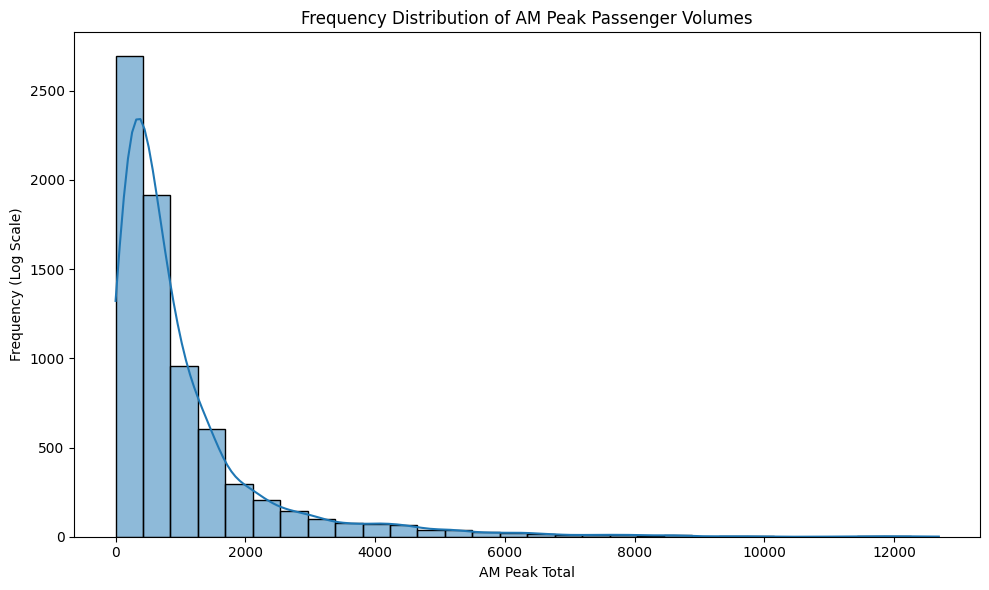

/Users/olisa/Lis/data_sci/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


<Figure size 1400x700 with 0 Axes>

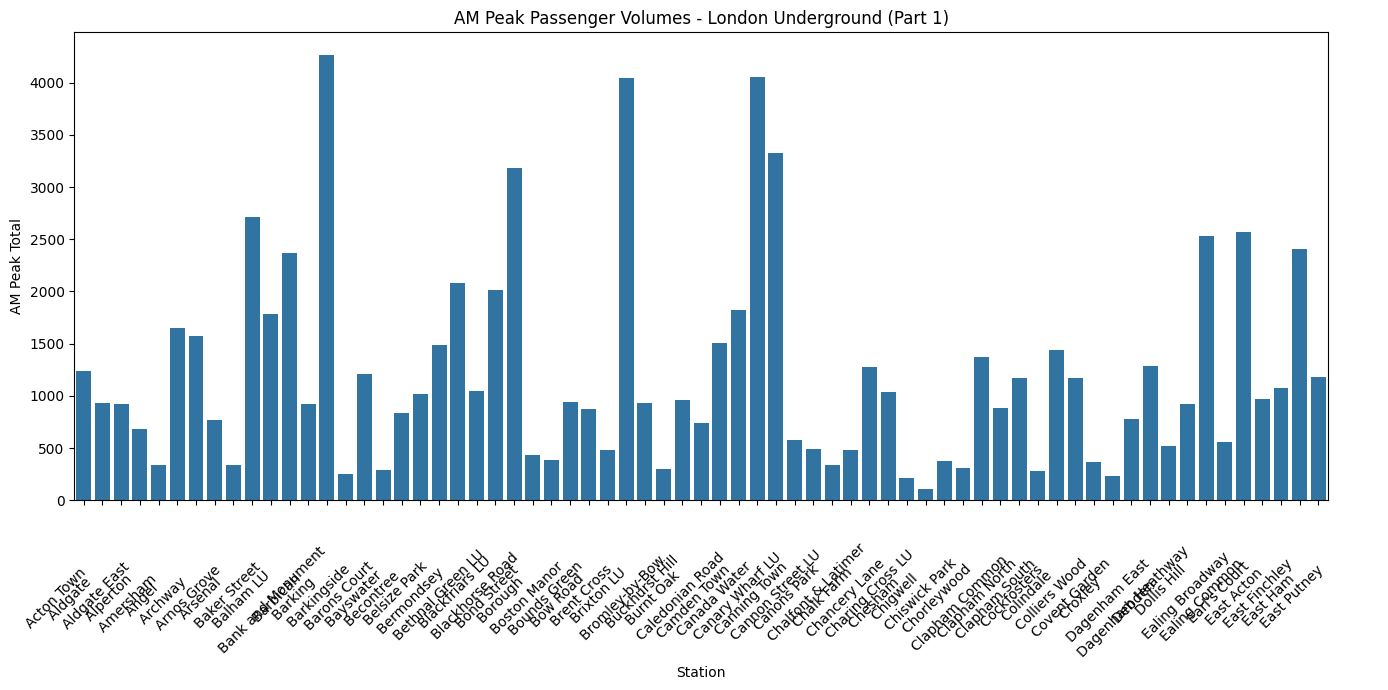

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


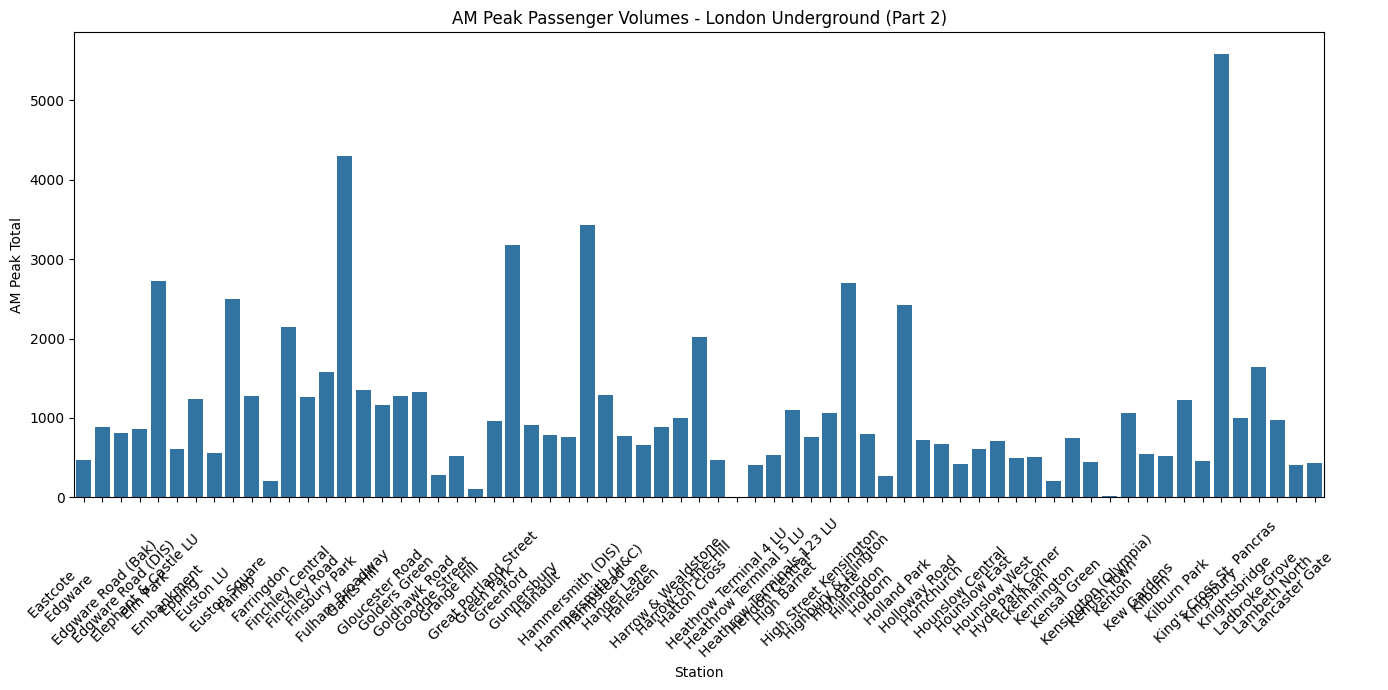

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


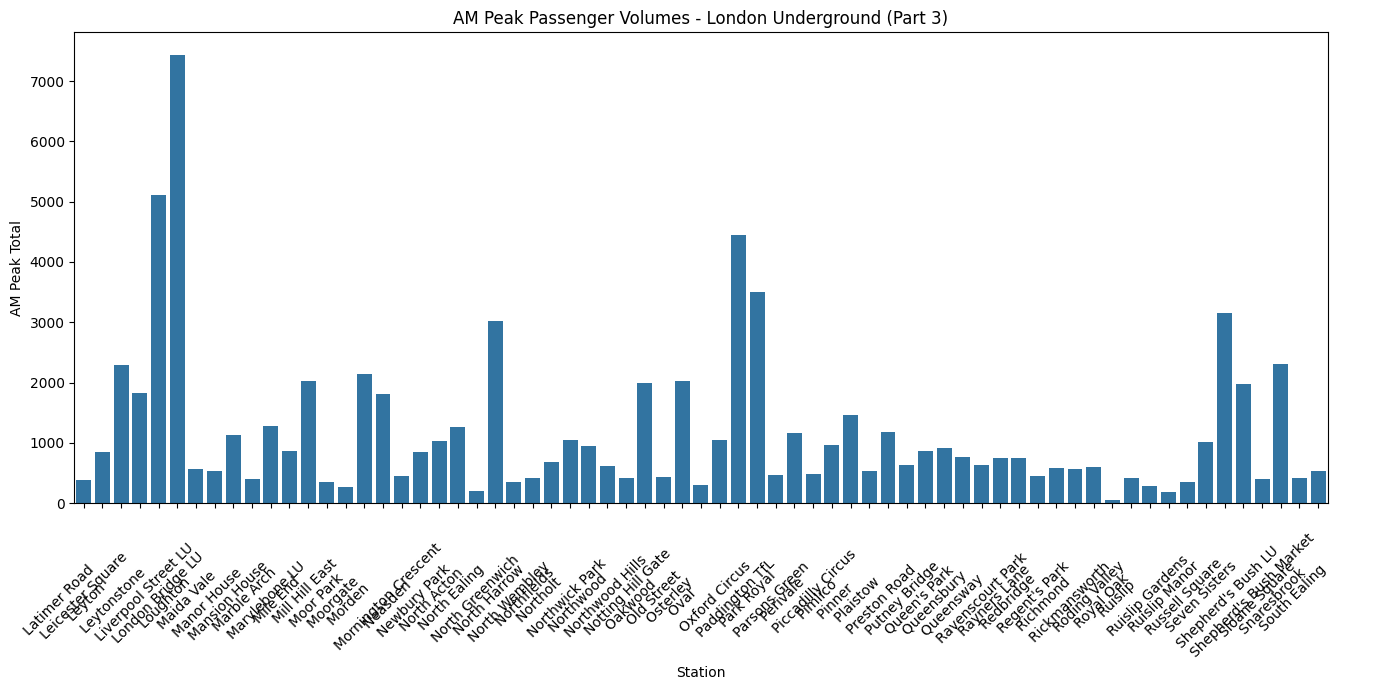

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


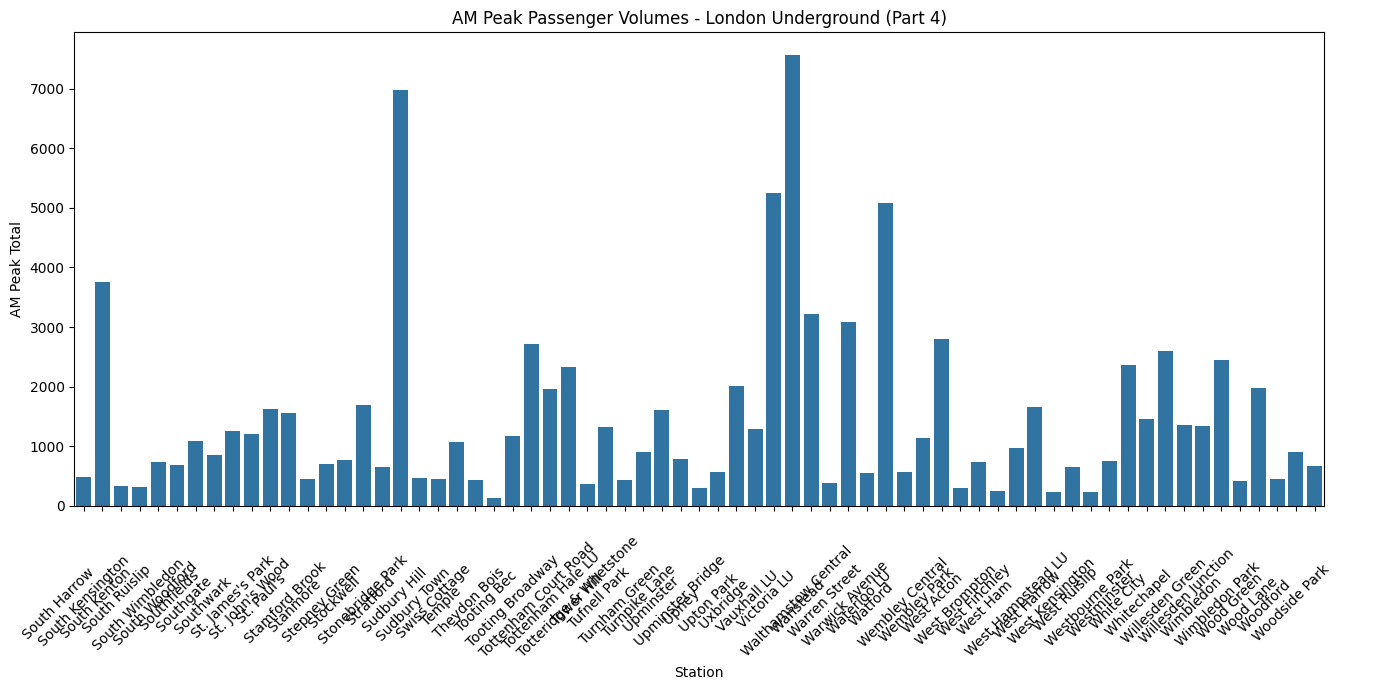

/Users/olisa/Lis/data_sci/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


<Figure size 1400x700 with 0 Axes>

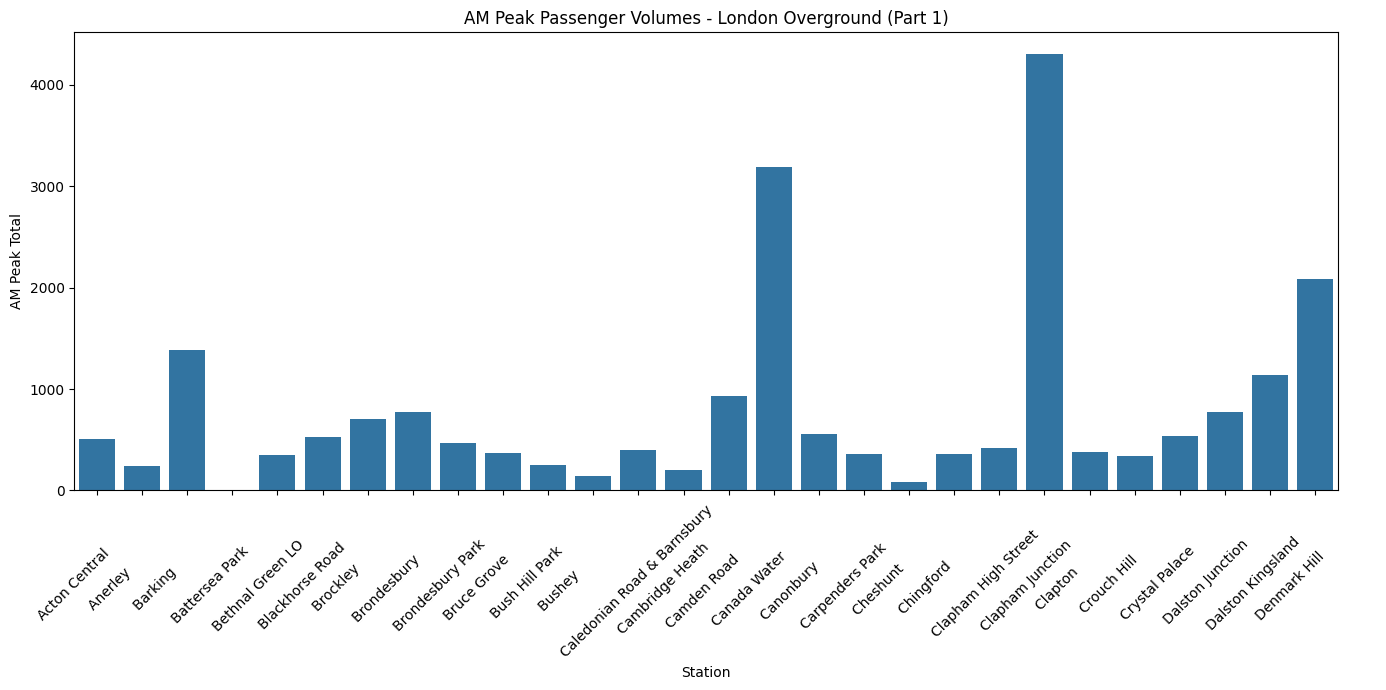

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


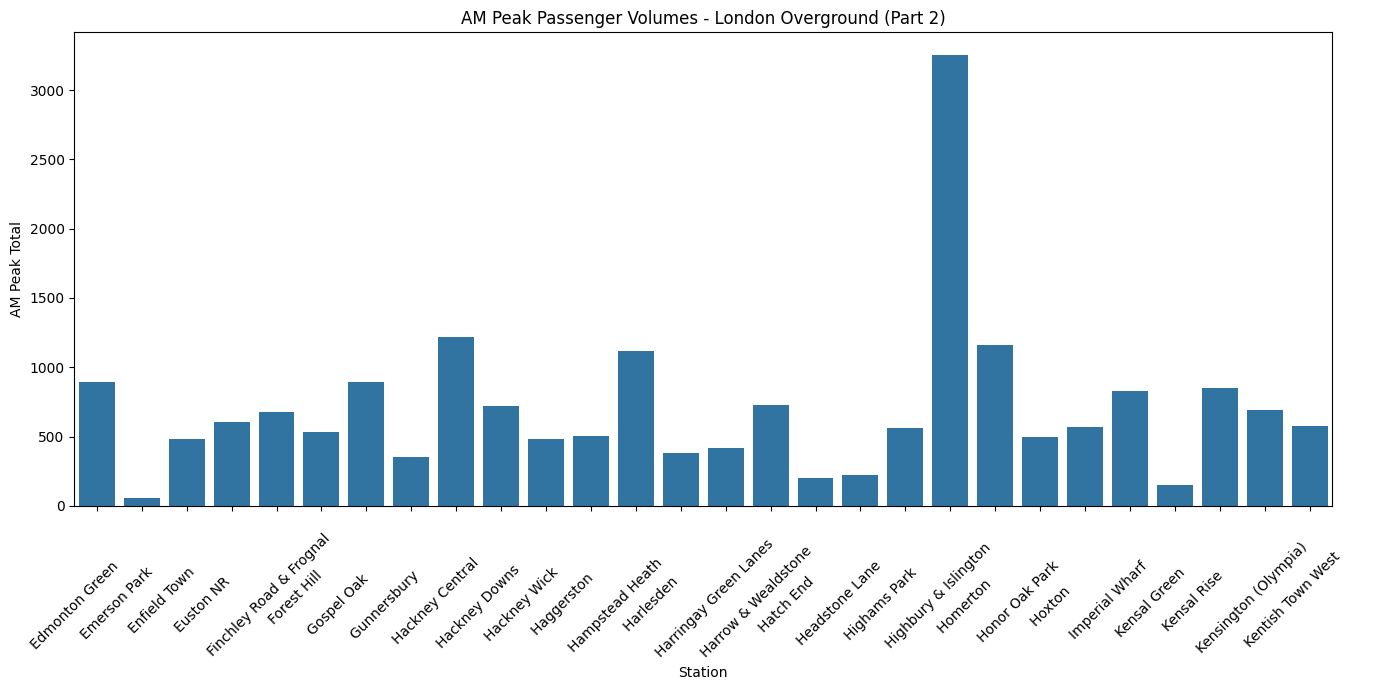

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


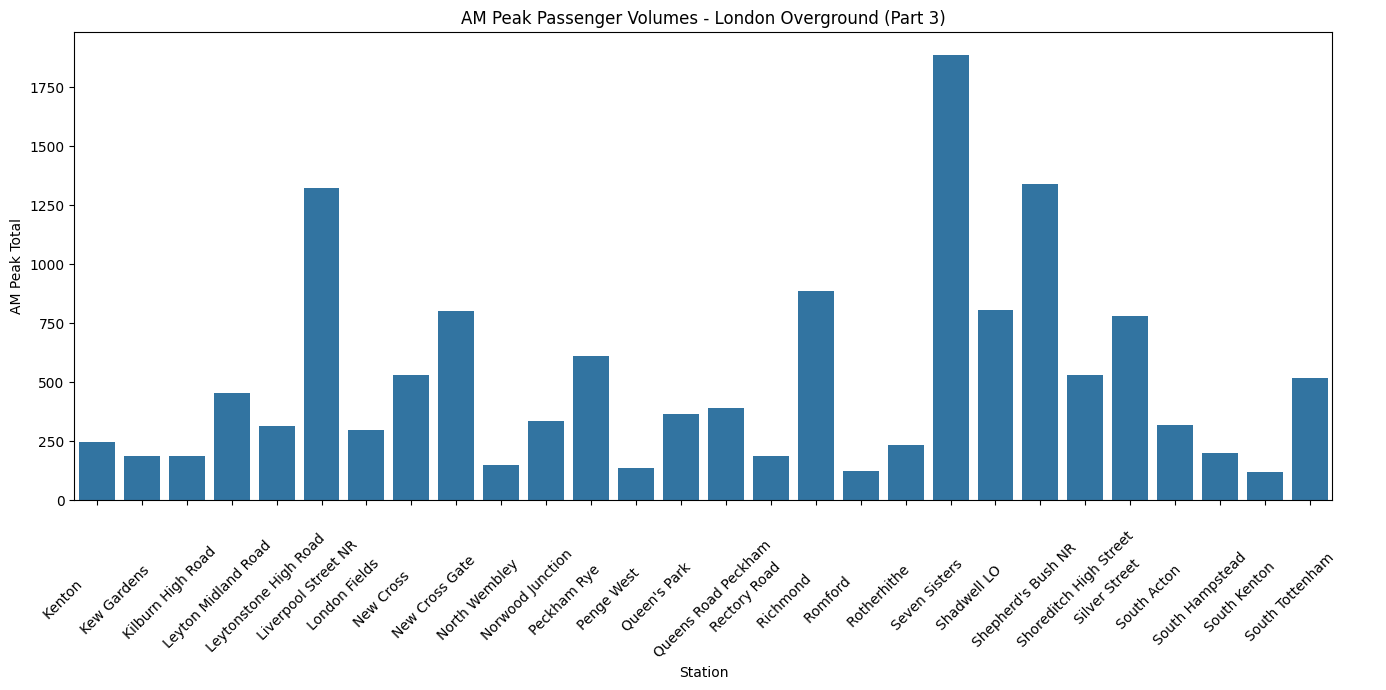

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=chunk, x='Station', y='AM peak total', ci=None)


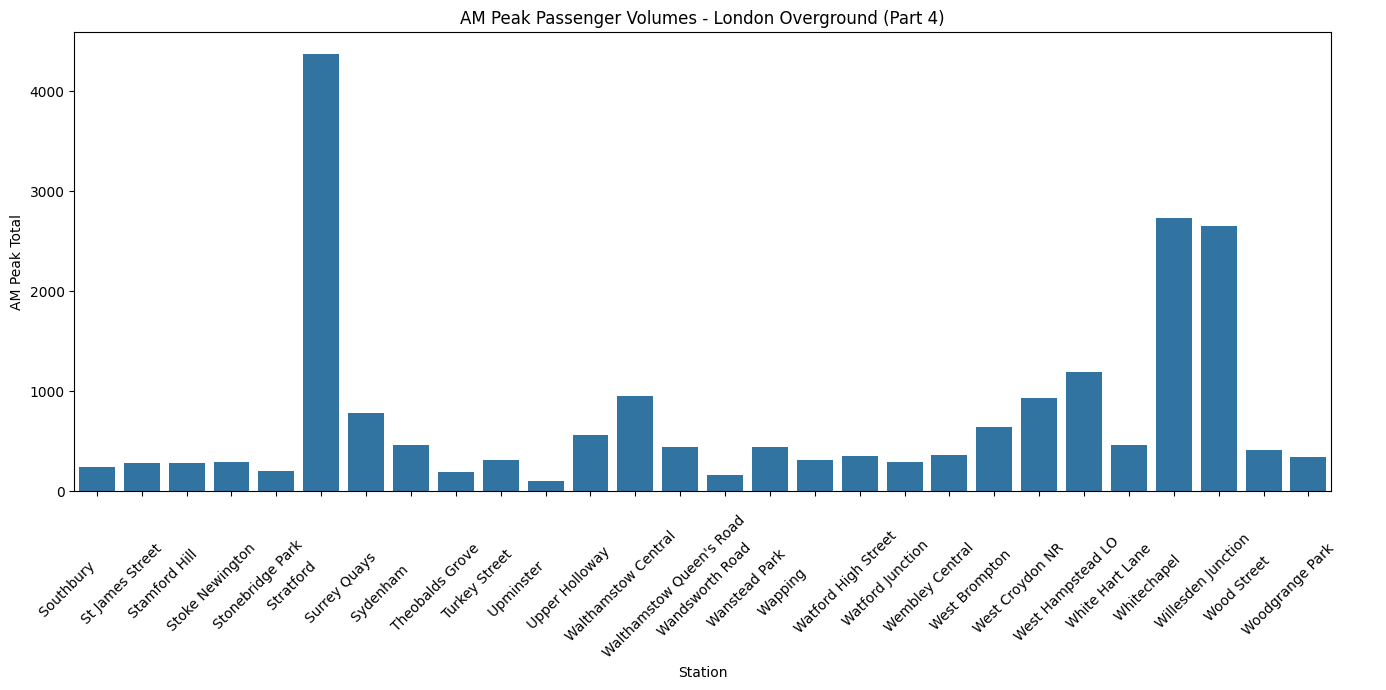

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mode_df, x='Station', y='AM peak total', ci=None)


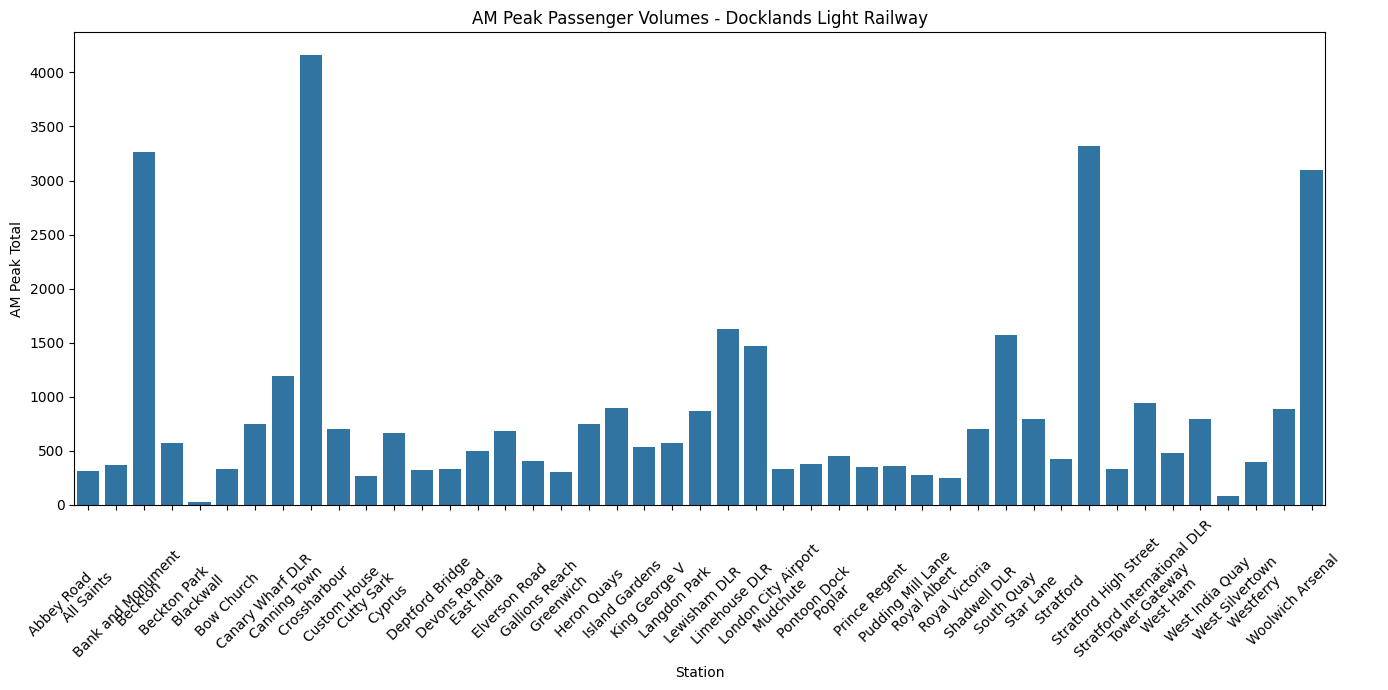

/var/folders/bb/2x_2rl7j4csgns2jrwmmxz880000gn/T/ipykernel_72766/3247145058.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mode_df, x='Station', y='AM peak total', ci=None)


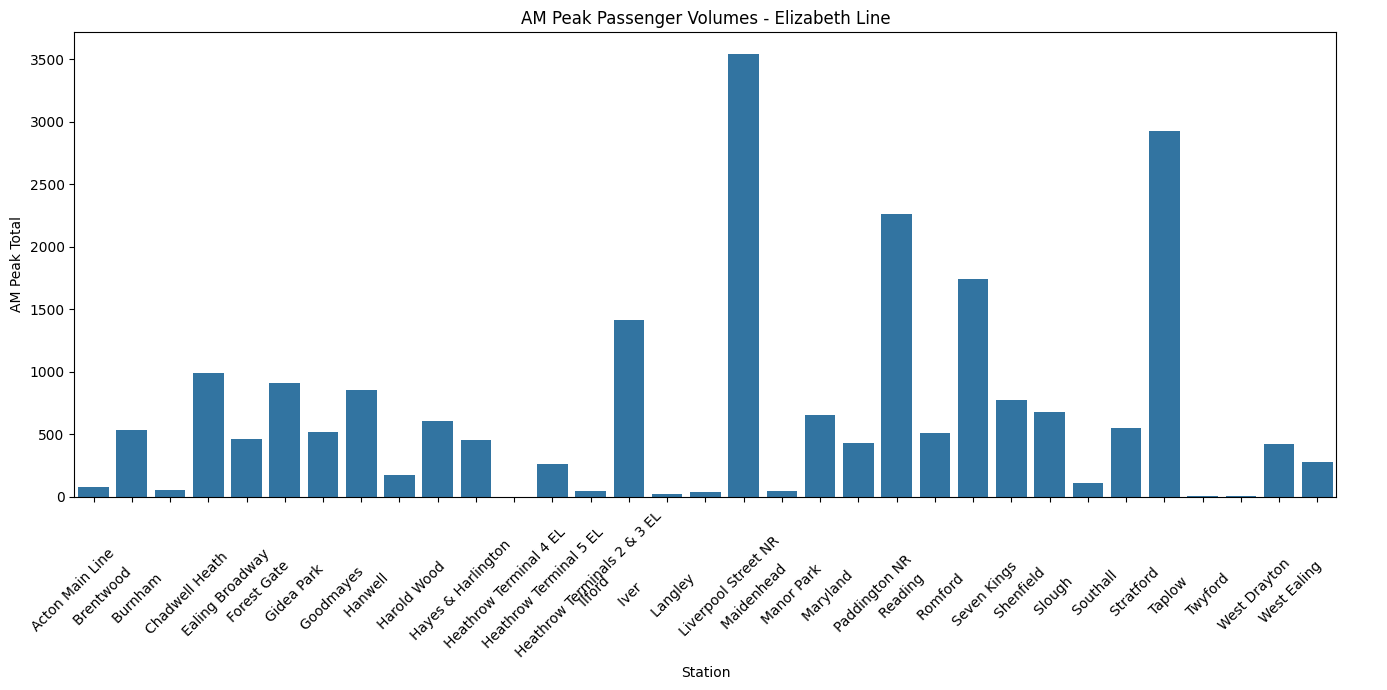

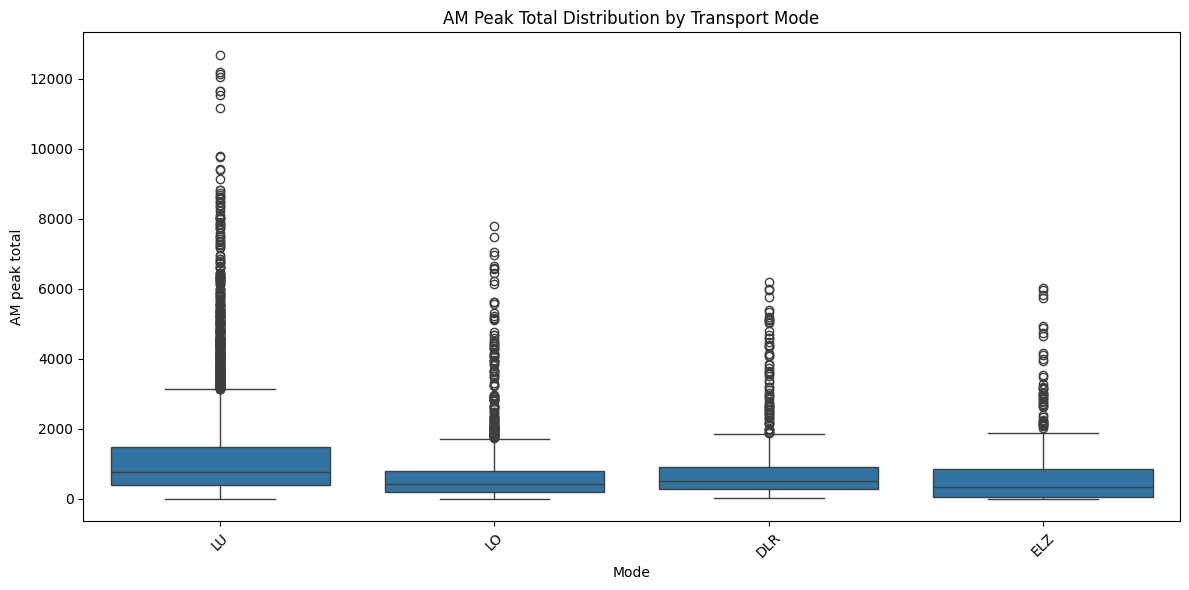

In [77]:
# Applying the EDA functions
print("Summary of AM Peak Volumes:")
print(summarize_am_peak(df_merged))

plot_volume_distribution(df_merged)

clean_mode_column(df_merged)

plot_volume_by_mode(df_merged)

visualize_results(df_merged)



## 5. Feature Engineering (L6 Students Only)


In [8]:
# Generate at least one new feature that could enhance predictive power, if relevant to the analysis.  



**Double click this cell to justify the choices for creating or modifying features.**

## 6. Statistical Analysis / Hypothesis Testing


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from typing import Dict
import seaborn as sns
import matplotlib.pyplot as plt

def perform_ttest(df: pd.DataFrame) -> Dict:
   
    # Create binary LU indicator
    df['is_LU'] = (df['Mode'] == 'LU').astype(int)
    
    lu_data = df[df['is_LU'] == 1]['AM peak total']
    non_lu_data = df[df['is_LU'] == 0]['AM peak total']
    
    t_stat, p_value = stats.ttest_ind(lu_data, non_lu_data)
    
    results = {
        't_statistic': t_stat,
        'p_value': p_value,
        'lu_mean': lu_data.mean(),
        'non_lu_mean': non_lu_data.mean(),
        'significant': p_value < 0.05
    }
    
    return results

def calculate_confidence_intervals(df: pd.DataFrame) -> Dict:
   
    # Create binary LU indicator if it doesn't exist
    if 'is_LU' not in df.columns:
        df['is_LU'] = (df['Mode'] == 'LU').astype(int)
    
    lu_data = df[df['is_LU'] == 1]['AM peak total']
    non_lu_data = df[df['is_LU'] == 0]['AM peak total']
    
    # Calculate confidence interval for LU data
    lu_mean = np.mean(lu_data)
    lu_sem = stats.sem(lu_data)
    lu_ci = stats.t.interval(confidence=0.95, 
                           df=len(lu_data)-1,
                           loc=lu_mean,
                           scale=lu_sem)
    
    # Calculate confidence interval for non-LU data
    non_lu_mean = np.mean(non_lu_data)
    non_lu_sem = stats.sem(non_lu_data)
    non_lu_ci = stats.t.interval(confidence=0.95,
                                df=len(non_lu_data)-1,
                                loc=non_lu_mean,
                                scale=non_lu_sem)
    
    return {
        'LU_CI': lu_ci,
        'non_LU_CI': non_lu_ci
    }


def run_full_analysis(df: pd.DataFrame) -> Dict:
  
    # Add LU indicator
    df['is_LU'] = (df['Mode'] == 'LU').astype(int)
    
    # Run analyses
    ttest_results = perform_ttest(df)
    ci_results = calculate_confidence_intervals(df)
    
    
    return {
        'ttest': ttest_results,
        'confidence_intervals': ci_results
    }

In [ ]:
def format_results(results: Dict) -> Dict:
    
    formatted = {
        'ttest': {
            't_statistic': f"{results['ttest']['t_statistic']:.2f}",
            'p_value': f"{results['ttest']['p_value']:.2e}", 
            'lu_mean': f"{results['ttest']['lu_mean']:.1f}",
            'non_lu_mean': f"{results['ttest']['non_lu_mean']:.1f}",
            'significant': results['ttest']['significant']
        },
        'confidence_intervals': {
            'LU_CI': (
                f"{results['confidence_intervals']['LU_CI'][0]:.1f}",
                f"{results['confidence_intervals']['LU_CI'][1]:.1f}"
            ),
            'non_LU_CI': (
                f"{results['confidence_intervals']['non_LU_CI'][0]:.1f}",
                f"{results['confidence_intervals']['non_LU_CI'][1]:.1f}"
            )
        }
    }
    return formatted

In [ ]:


results = run_full_analysis(df_merged)
formatted_results = format_results(results)
print(formatted_results)


{'ttest': {'t_statistic': '17.44', 'p_value': '9.02e-67', 'lu_mean': '1238.2', 'non_lu_mean': '719.9', 'significant': np.True_}, 'confidence_intervals': {'LU_CI': ('1195.3', '1281.1'), 'non_LU_CI': ('686.3', '753.4')}}


### Interpret p-values or other test statistics.

T-Test Results:
T-statistic: 17.44 (large positive value indicates substantial difference between groups)
P-value: 9.02e-67 (extremely small, much less than 0.05 significance level)

Mean Values:
LU stations: 1,238.2 passengers
Non-LU stations: 719.9 passengers


The difference is statistically significant (p < 0.05)


Confidence Intervals (95%):

LU stations: (1,195.3, 1,281.1)
Non-LU stations: (686.3, 753.4)

# 7. Conclusion and Interpretation

### Summarise findings, discussing any insights gained in relation to the initial hypotheses.  
Key Insights:

Strong Support for Hypothesis:
The t-test shows a highly significant difference between LU and non-LU stations
LU stations handle on average 518 more passengers during AM peak compared to non-LU stations
The extremely small p-value (9.02e-67) suggests this difference is very unlikely to be due to chance


Precision of Estimates:
The confidence intervals don't overlap at all, further confirming the significant difference
For LU stations, we're 95% confident the true mean lies between 1,195 and 1,281 passengers
For non-LU stations, we're 95% confident the true mean lies between 686 and 753 passengers





### Reflect on any limitations or areas for future analysis.
Potential Confounding Factors:

Station location (central vs. outskirts)
Interchange status (single mode vs. multiple modes)
Local population density
Proximity to business districts


Data Considerations:

Only looks at AM peak, might not represent full daily patterns
Doesn't account for seasonal variations
Possible outliers affecting means


Suggested Further Analyses:

Add geographic analysis to account for location effects
Analyze interchange effects where stations serve multiple modes


In [107]:
def regression(df):
 
    try:
        # Convert dummy variables to numpy array
        dummies = pd.get_dummies(df['Mode'], prefix='mode', drop_first=True)  # LU as reference
        X = dummies.values.astype(float)
        
        # Add constant term
        X = sm.add_constant(X)
        
        # Convert target to numpy array
        y = df['AM peak total'].values.astype(float)
        
        # Fit model
        model = sm.OLS(y, X).fit()
        
        # Get mode names for reporting (excluding LU which is reference)
        mode_names = [col.replace('mode_', '') for col in dummies.columns]
        
        # Calculate standard deviation of AM peak total for each mode
        mode_sds = df.groupby('Mode')['AM peak total'].std()
        
        # Print results
        print("\nREGRESSION RESULTS")
        print("==================")
        
        print("\n1. MODEL FIT STATISTICS")
        print(f"R-squared: {model.rsquared:.3f}")
        print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
        print(f"F-statistic: {model.fvalue:.2f}")
        print(f"F-test p-value: {model.f_pvalue:.2e}")
        print(f"Number of observations: {int(model.nobs)}")
        
        print("\n2. COEFFICIENTS AND SIGNIFICANCE")
        print(f"Baseline (LU mean): {model.params[0]:.1f}")
        print(f"LU Standard Deviation: {mode_sds['LU']:.1f}")
        
        print("\n3. DIFFERENCES FROM LU:")
        for i, mode in enumerate(mode_names):
            print(f"\n{mode}:")
            print(f"Difference from LU: {model.params[i+1]:.1f}")
            print(f"Standard Deviation: {mode_sds[mode]:.1f}")
            print(f"p-value: {model.pvalues[i+1]:.2e}")
        
        # Basic visualization
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Mode', y='AM peak total', data=df)
        plt.title('AM Peak Total by Mode')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return model
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("\nShape of data:")
        print("X shape:", X.shape)
        print("y shape:", y.shape)
        print("\nData types:")
        print("X dtype:", X.dtype)
        print("y dtype:", y.dtype)
        return None


REGRESSION RESULTS

1. MODEL FIT STATISTICS
R-squared: 0.041
Adjusted R-squared: 0.041
F-statistic: 104.64
F-test p-value: 2.47e-66
Number of observations: 7328

2. COEFFICIENTS AND SIGNIFICANCE
Baseline (LU mean): 845.3
LU Standard Deviation: 1432.7

3. DIFFERENCES FROM LU:

ELZ:
Difference from LU: -168.8
Standard Deviation: 955.7
p-value: 1.88e-02

LO:
Difference from LU: -163.1
Standard Deviation: 902.7
p-value: 3.19e-03

LU:
Difference from LU: 392.9
Standard Deviation: 1432.7
p-value: 7.87e-15


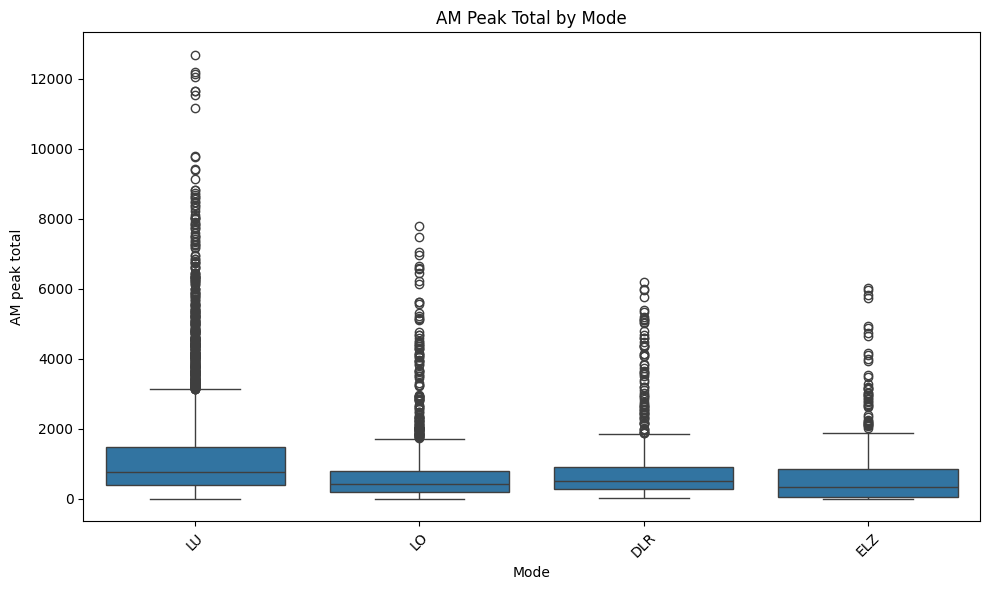

In [ ]:
regression(df_merged)

Regression Analysis:

The regression model, while significant (F-test p-value: 2.47e-66), has a low R-squared value (0.041), indicating that only a small proportion of the variance in AM Peak Totals is explained by the mode of transport. This suggests that other factors beyond transport mode contribute to the observed differences.
LU stations have the highest baseline mean (845.3 passengers), while other modes like Elizabeth Line (ELZ) and London Overground (LO) show statistically significant but smaller AM Peak Totals, with differences of -168.8 and -163.1, respectively.
Strength of Evidence:

The extremely small p-values in both t-tests and regression analyses confirm that these differences are not due to random chance.
LU stations consistently outperform non-LU stations in AM Peak Totals, even after adjusting for variability within each mode.

Summary
Overall, the results provide robust evidence for significant differences in AM Peak Totals between LU and non-LU stations, affirming the hypothesis. However, the relatively low explanatory power of the regression model highlights the need for a broader analysis incorporating other influential factors, such as station location, interchange status, and local demographics.

